# Using Bézier surfaces in a Python environment for 3D modeling and visualization of geological structures

## The Geologic Map

Vamos a comenzar digitalizando con python el mapa geológico de la zona.

Los datos y las figuras que vamos creando los colocaremos en los directorios **data** y **figures**. Establecemos estos directorios en nuestra area de trabajo.

In [1]:
DATADIR='data/' # Directory with the data
FIGURESDIR='figures/' # Figures produced

Para leer imágenes utilizamos la librería gráfica **Pillow** que cargamos a continuación.

In [2]:
from PIL import Image

Ahora cargamos el mapa como imagen

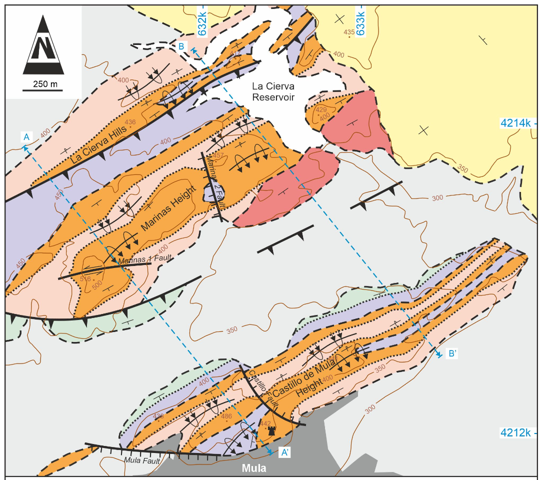

In [3]:
geo_map=Image.open(FIGURESDIR+'geological_map.png')
geo_map

Vamos a digitalizar este mapa, transformamdo cada uno de los trazos que aparecen en tracks con coordenada UTM. Nuestras herramientas serán: Google maps, gpsvisualizer (https://www.gpsvisualizer.com/convert_input) y Qgis. 

- Con **Google maps** dibujaremos tracks que exportaremos como ficheros .kml. 
- Utilizamos la aplicación online **gpsvisualizer**  para transformar estos ficheros en ficheros .gpx. 
- Por último importamos los ficheros gpx en **Qgis**, calculamos coordenadas UTM de los puntos que determina cada track y exportamos estos datos a ficheros csv. 
- Para tratar en Python estos ficheros cvs utilizaremos la librería de Python **Pandas** que está especializada en el manejo y análisis de estructuras de datos.

In [4]:
# data analysis library
import pandas as pd

Definiremos funciones que nos harán más fácil el manejo de datos. 

Por ejemplo, la funcion **contact_tr** lee un archivo csv en el que hay columnas X, Y y SAMPLE_1 correspondientes a las coordenadas UTMX, UTMY y altura y devuelve una lista con la lista de coordenadas X, la lista de coordenads Y y la lista de alturas a las que le hemos sumado una constante elevation_gain.

In [5]:
def contact_tr(csv,elevation_gain):
    tr=pd.read_csv(csv)
    tr1=tr[['X','Y','SAMPLE_1']].to_numpy()
    tx=[x[0] for x in tr1]
    ty=[x[1] for x in tr1]
    telv=[x[2]+elevation_gain for x in tr1]
    return [tx,ty,telv]

Leemos los ficheros cvs correspondientes a los tracks creados con Google maps.

In [6]:
# Tracks in surface

tr1=contact_tr(DATADIR+'tr/tr1.csv',0)
tr2=contact_tr(DATADIR+'tr/tr2.csv',0)
tr3=contact_tr(DATADIR+'tr/tr3.csv',0)
tr4=contact_tr(DATADIR+'tr/tr4.csv',0)
tr5=contact_tr(DATADIR+'tr/tr5.csv',0)
tr6=contact_tr(DATADIR+'tr/tr6.csv',0)
tr7=contact_tr(DATADIR+'tr/tr7.csv',0)
tr8=contact_tr(DATADIR+'tr/tr8.csv',0)
tr9=contact_tr(DATADIR+'tr/tr9.csv',0)
tr10=contact_tr(DATADIR+'tr/tr10.csv',0)
tr11=contact_tr(DATADIR+'tr/tr11.csv',0)
tr12=contact_tr(DATADIR+'tr/tr12.csv',0)
tr13=contact_tr(DATADIR+'tr/tr13.csv',0)
tr14=contact_tr(DATADIR+'tr/tr14.csv',0)

f1=contact_tr(DATADIR+'tr/f1.csv',0)
f2=contact_tr(DATADIR+'tr/f2.csv',0)
f3=contact_tr(DATADIR+'tr/f3.csv',0)
f4=contact_tr(DATADIR+'tr/f4.csv',0)

Algunos de estos tracks los hemos de dividir, para hacer próximos cálculos.

In [7]:
tr1a=[tr1[0][:18],tr1[1][:18],tr1[2][:18]]
tr1b=[tr1[0][18:],tr1[1][18:],tr1[2][18:]]

tr2a=[tr2[0][:15],tr2[1][:15],tr2[2][:15]]
tr2b=[tr2[0][15:],tr2[1][15:],tr2[2][15:]]

tr6a=[tr6[0][:23],tr6[1][:23],tr6[2][:23]]
tr6b=[tr6[0][23:],tr6[1][23:],tr6[2][23:]]

tr7a=[tr7[0][:5],tr7[1][:5],tr7[2][:5]]
tr7b=[tr7[0][5:],tr7[1][5:],tr7[2][5:]]

tr12a=[tr12[0][:30],tr12[1][:30],tr12[2][:30]]
tr12b=[tr12[0][30:38],tr12[1][30:38],tr12[2][30:38]]
tr12c=[tr12[0][38:],tr12[1][38:],tr12[2][38:]]

tr13a=[tr13[0][:12],tr13[1][:12],tr13[2][:12]]
tr13b=[tr13[0][19:],tr13[1][19:],tr13[2][19:]]

tr14a=[tr14[0][:6],tr14[1][:6],tr14[2][:6]]
tr14b=[tr14[0][5:],tr14[1][5:],tr14[2][5:]]



Las funciones custom que vamos creando las definimos en el fichero .py auxiliar  **functions.py** que cargamos a continuación 

In [8]:
import functions
from functions import *

Los paquetes gráficos que vamos a utilizar serán **plotly** y **matplotlib**. Hemos cargado estos paquetes al importar el fichero **function**.

La función **contact_dat** transforma los datos de coordenadas en datos aptos para crear imágenes. 

In [9]:
techos=[tr1,tr2,tr4,tr5,tr6,tr7,tr9,tr10,tr11,tr12,tr13,tr14]
thrusts=[tr3,tr8]
fallas=[f1,f2,f3,f4]

techos_data=[contact_dat(x[0],x[1],x[2],10,"lines",'techos','black','techos'+str(x),True,None) for x in techos]
thruts_data=[contact_dat(x[0],x[1],x[2],10,"lines",'thrusts','orange','thusts'+str(x),True,None) for x in thrusts]
fallas_data=[contact_dat(x[0],x[1],x[2],20,"lines",'faults','black','fallas'+str(x),True,None) for x in fallas]

Ya estamos listos para dar el primer paso en la digitalización del mapa geológico.

<function matplotlib.pyplot.show(close=None, block=None)>

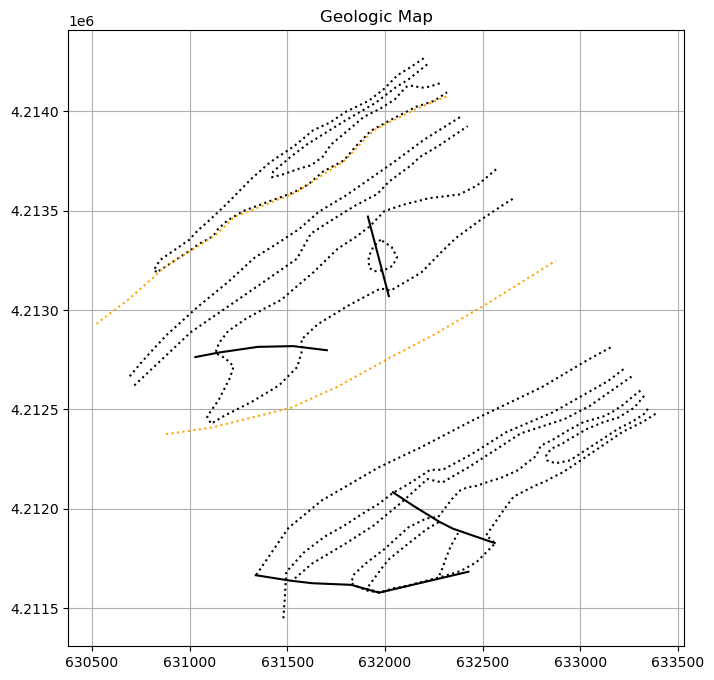

In [10]:
fig, ax = plt.subplots(1,figsize=(8,8))
for x in techos:
    ax.plot(x[0],x[1],linestyle='dotted',color='black')
for x in thrusts:
    ax.plot(x[0],x[1],linestyle='dotted',color='orange')    
for x in fallas:
    ax.plot(x[0],x[1],color='black')
    
ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
ax.grid()

plt.title('Geologic Map')
plt.show

Vamos a añadir siete líneas paralelás que representan las direcciónes de las secciones cruzadas que definiremos y unos rectángulos rojos que indicaran secciones pequeñas que desarrollaremos en bloques.

In [11]:
P0=[630312.260878774, 4213164.354736202]
P2=[631727.2235457341, 4211098.154021688]
P1=[632080.5579142272, 4214387.312460086]
P3=[633495.5205811873, 4212321.111745572]

In [12]:
d=distance(P0,P1)
r1=para_line(P0,P1)
r2=para_line(P2,P3)
t_points = np.concatenate([np.arange(0, d, d/6),[d]])
Qs=[r1(x) for x in t_points]
QQs=[r2(x) for x in t_points]

In [13]:
r1=[(631497,4213970),(631880,4213410),(632500,4213788),(632079,4214390),(631497,4213970)]
r1x=[x[0] for x in r1]
r1y=[x[1] for x in r1]

r2x=[630973, 631560, 631981, 631400,630973]
r2y=[4212829, 4213252, 4212624, 4212220,4212829]

r3=pd.read_csv(DATADIR+'recortes/r3.csv')
r3x=list(r3['X'])
r3y=list(r3['Y'])


<function matplotlib.pyplot.show(close=None, block=None)>

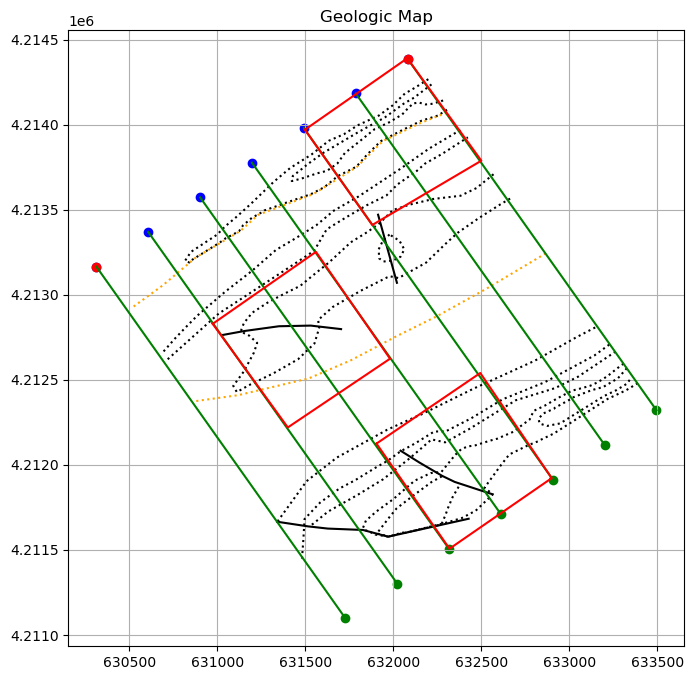

In [14]:
fig, ax = plt.subplots(1,figsize=(8,8))
for x in techos:
    ax.plot(x[0],x[1],linestyle='dotted',color='black')
for x in thrusts:
    ax.plot(x[0],x[1],linestyle='dotted',color='orange')    
for x in fallas:
    ax.plot(x[0],x[1],color='black')



ax.scatter([x[0] for x in Qs],[x[1] for x in Qs],color='blue')
ax.scatter([P0[0],P1[0]],[P0[1],P1[1]],color='red')
ax.scatter([x[0] for x in QQs],[x[1] for x in QQs],color='green')
for i in range(len(Qs)):
    ax.plot([Qs[i][0],QQs[i][0]],[Qs[i][1],QQs[i][1]],color='green')

ax.plot(r1x,r1y,color='red')
ax.plot(r2x,r2y,color='red')
ax.plot(r3x,r3y,color='red')

ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)


ax.grid()
plt.title('Geologic Map')
plt.savefig(FIGURESDIR+'geo_map.png',facecolor='white')
plt.show

Calculamos ahora los puntos de intersección de las secciones cruzadas y los tracks de techos, thrust y fallas. Para ello utilizaremos la función La función **intersection** que calcula los puntos de intersección de un polígono (o un track) con una linea recta.

In [15]:
techos_cretaceus=[tr9]
techos_eocene1=[tr1,tr5,tr6,tr11,tr12]
techos_paleocene=[tr2,tr4,tr7,tr10,tr13,tr14]

In [16]:
int_techos_cretaceus=[intercection(tr9,Qs[i],QQs[i]) for i in range(len(Qs))]
int_techos_cretaceusx=[x[0] for x in int_techos_cretaceus]
int_techos_cretaceusy=[x[1] for x in int_techos_cretaceus]

Guardamos estos datos en un fichero csv para su uso posterior

In [17]:
dict = {'X': int_techos_cretaceusx, 'Y': int_techos_cretaceusy} 
int_techos_cretaceus=pd.DataFrame(dict)
int_techos_cretaceus
  

,X,Y
0,631339.474746,4.211664e+06
1,631572.945345,4.211958e+06
2,631872.852092,4.212154e+06
3,632205.321102,4.212303e+06
4,632519.396487,4.212478e+06
5,632845.292740,4.212636e+06
6,633158.277292,4.212814e+06


In [18]:
int_techos_cretaceus.to_csv(DATADIR+'intersections/int_techos_cretaceus.csv',index=False)

Procedemos con el resto de las intersecciones

In [19]:
int_tr1a=[intercection(tr1a,Qs[i],QQs[i]) for i in range(2,len(Qs))]
int_tr1ax=[x[0] for x in int_tr1a]
int_tr1ay=[x[1] for x in int_tr1a]

int_tr1b=[intercection(tr1b,Qs[i],QQs[i]) for i in range(2,len(Qs))]
int_tr1bx=[x[0] for x in int_tr1b]
int_tr1by=[x[1] for x in int_tr1b]


int_tr5=[intercection(tr5,Qs[i],QQs[i]) for i in range(len(Qs))]
int_tr5x=[x[0] for x in int_tr5]
int_tr5y=[x[1] for x in int_tr5]

int_tr6a=[intercection(tr6a,Qs[i],QQs[i]) for i in range(1,len(Qs))]
int_tr6ax=[x[0] for x in int_tr6a]
int_tr6ay=[x[1] for x in int_tr6a]

int_tr6b=[intercection(tr6b,Qs[i],QQs[i]) for i in range(1,len(Qs))]
int_tr6bx=[x[0] for x in int_tr6b]
int_tr6by=[x[1] for x in int_tr6b]


int_tr11=[intercection(tr11,Qs[i],QQs[i]) for i in range(1,len(Qs))]
int_tr11x=[x[0] for x in int_tr11]
int_tr11y=[x[1] for x in int_tr11]

int_tr12a=[intercection(tr12a,Qs[i],QQs[i]) for i in range(2,len(Qs))]
int_tr12ax=[x[0] for x in int_tr12a]+[tr12a[0][-4]]
int_tr12ay=[x[1] for x in int_tr12a]+[tr12a[1][-4]]

int_tr12b=[intercection(tr12b,Qs[i],QQs[i]) for i in [2,3]]
int_tr12bx=[x[0] for x in int_tr12b]
int_tr12by=[x[1] for x in int_tr12b]

int_tr12c=[intercection(tr12c,Qs[i],QQs[i]) for i in range(3,len(Qs))]
int_tr12cx=[x[0] for x in int_tr12c]
int_tr12cy=[x[1] for x in int_tr12c]

int_techos_eocene1x=int_tr1ax+int_tr1bx+int_tr5x+int_tr6ax+int_tr6bx+int_tr11x+int_tr12ax+int_tr12bx+int_tr12cx
int_techos_eocene1y=int_tr1ay+int_tr1by+int_tr5y+int_tr6ay+int_tr6by+int_tr11y+int_tr12ay+int_tr12by+int_tr12cy

In [20]:
dict = {'X': int_techos_eocene1x, 'Y': int_techos_eocene1y} 
int_techos_eocene1=pd.DataFrame(dict)
int_techos_eocene1.to_csv(DATADIR+'intersections/int_techos_eocene1.csv',index=False)

In [21]:
int_tr2a=[intercection(tr2a,Qs[i],QQs[i]) for i in range(4,len(Qs))]
int_tr2ax=[x[0] for x in int_tr2a]
int_tr2ay=[x[1] for x in int_tr2a]

int_tr2b=[intercection(tr2b,Qs[i],QQs[i]) for i in range(4,len(Qs))]
int_tr2bx=[x[0] for x in int_tr2b]
int_tr2by=[x[1] for x in int_tr2b]

int_tr4=[intercection(tr4,Qs[i],QQs[i]) for i in range(len(Qs))]
int_tr4x=[x[0] for x in int_tr4]
int_tr4y=[x[1] for x in int_tr4]

int_tr7a=[intercection(tr7a,Qs[i],QQs[i]) for i in [4]]
int_tr7ax=[x[0] for x in int_tr7a]
int_tr7ay=[x[1] for x in int_tr7a]

int_tr7b=[intercection(tr7b,Qs[i],QQs[i]) for i in [4]]
int_tr7bx=[x[0] for x in int_tr7b]
int_tr7by=[x[1] for x in int_tr7b]

int_tr10=[intercection(tr10,Qs[i],QQs[i]) for i in range(len(Qs))]
int_tr10x=[x[0] for x in int_tr10]
int_tr10y=[x[1] for x in int_tr10]

int_tr13a=[intercection(tr13a,Qs[i],QQs[i]) for i in range(5,len(Qs))]
int_tr13ax=[x[0] for x in int_tr13a]
int_tr13ay=[x[1] for x in int_tr13a]

int_tr13b=[intercection(tr13b,Qs[i],QQs[i]) for i in range(5,len(Qs))]
int_tr13bx=[x[0] for x in int_tr13b]
int_tr13by=[x[1] for x in int_tr13b]

int_tr14a=[intercection(tr14a,Qs[i],QQs[i]) for i in [2]]
int_tr14ax=[x[0] for x in int_tr14a]
int_tr14ay=[x[1] for x in int_tr14a]

int_tr14b=[intercection(tr12b,Qs[i],QQs[i]) for i in [2]]
int_tr14bx=[x[0] for x in int_tr14b]
int_tr14by=[x[1] for x in int_tr14b]

int_techos_paleocenex=int_tr2ax+int_tr2bx+int_tr4x+int_tr7ax+int_tr7bx+int_tr10x+int_tr13ax+int_tr13bx+int_tr14ax+int_tr14bx
int_techos_paleoceney=int_tr2ay+int_tr2by+int_tr4y+int_tr7ay+int_tr7by+int_tr10y+int_tr13ay+int_tr13by+int_tr14ay+int_tr14by

In [22]:
dict = {'X': int_techos_paleocenex, 'Y': int_techos_paleoceney} 
int_techos_paleocene=pd.DataFrame(dict)
int_techos_paleocene.to_csv(DATADIR+'intersections/int_techos_paleocene.csv',index=False)

In [23]:
int_tr3=[intercection(tr3,Qs[i],QQs[i]) for i in range(len(Qs))]
int_tr3x=[x[0] for x in int_tr3]
int_tr3y=[x[1] for x in int_tr3]

int_tr8=[intercection(tr8,Qs[i],QQs[i]) for i in range(len(Qs))]
int_tr8x=[x[0] for x in int_tr8]
int_tr8y=[x[1] for x in int_tr8]

In [24]:
dict1 = {'X': int_tr3x, 'Y': int_tr3y} 
int_cierva=pd.DataFrame(dict1)
int_cierva.to_csv(DATADIR+'intersections/int_cierva.csv',index=False)

dict2 = {'X': int_tr8x, 'Y': int_tr8y} 
int_castillo=pd.DataFrame(dict2)
int_castillo.to_csv(DATADIR+'intersections/int_castillo.csv',index=False)

In [25]:
int_f1=[intercection(f1,Qs[i],QQs[i]) for i in [4]]
int_f1x=[x[0] for x in int_f1]
int_f1y=[x[1] for x in int_f1]

int_f2=[intercection(f2,Qs[i],QQs[i]) for i in [1,2]]
int_f2x=[x[0] for x in int_f2]
int_f2y=[x[1] for x in int_f2]

int_f3=[intercection(f3,Qs[i],QQs[i]) for i in [3]]
int_f3x=[x[0] for x in int_f3]
int_f3y=[x[1] for x in int_f3]

int_f4=[intercection(f4,Qs[i],QQs[i]) for i in [0,1,2]]
int_f4x=[x[0] for x in int_f4]
int_f4y=[x[1] for x in int_f4]

int_faultx=int_f1x+int_f2x+int_f3x+int_f4x
int_faulty=int_f1y+int_f2y+int_f3y+int_f4y

In [26]:
dict = {'X': int_faultx, 'Y': int_faulty} 
int_fault=pd.DataFrame(dict)
int_fault.to_csv(DATADIR+'intersections/int_fault.csv',index=False)

La figura **geo_map.png** que creamos a continuación es una digitalización en el entorno Python del mapa geológico 'geological_map.png' con el que comenzamos.

Los datos necesarios para contruir esta figura **geo_map** serán almacenados en nuestro directorio **data** de datos como ficheros csv para su posterior uso.

<function matplotlib.pyplot.show(close=None, block=None)>

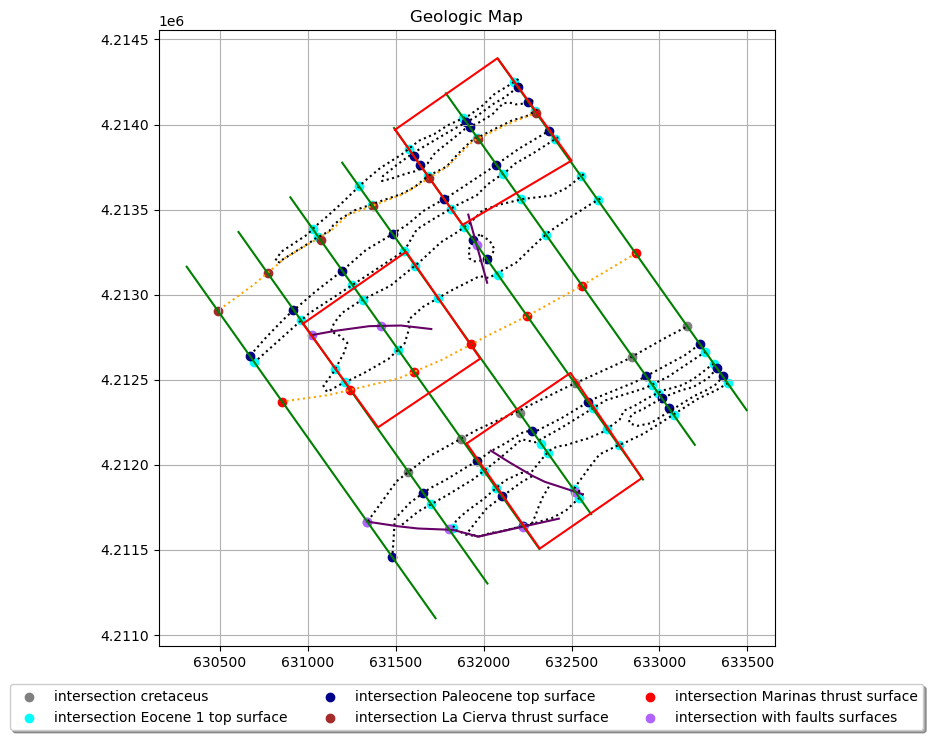

In [27]:
fig, ax = plt.subplots(1,figsize=(8,8))
for x in techos:
    ax.plot(x[0],x[1],linestyle='dotted',color='black')
for x in thrusts:
    ax.plot(x[0],x[1],linestyle='dotted',color='orange')    
for x in fallas:
    ax.plot(x[0],x[1],color='#660066')

#ax.scatter([x[0] for x in Qs],[x[1] for x in Qs],color='blue')
#ax.scatter([P0[0],P1[0]],[P0[1],P1[1]],color='red')
#ax.scatter([x[0] for x in QQs],[x[1] for x in QQs],color='green')
for i in range(len(Qs)):
    ax.plot([Qs[i][0],QQs[i][0]],[Qs[i][1],QQs[i][1]],color='green')
    
ax.scatter(int_techos_cretaceusx,int_techos_cretaceusy,color='gray',label='intersection cretaceus')
ax.scatter(int_techos_eocene1x,int_techos_eocene1y,color='#00feff',label='intersection Eocene 1 top surface')
ax.scatter(int_techos_paleocenex,int_techos_paleoceney,color='#00008B',label='intersection Paleocene top surface')

ax.scatter(int_tr3x,int_tr3y,color='brown',label='intersection La Cierva thrust surface')
ax.scatter(int_tr8x,int_tr8y,color='red',label='intersection Marinas thrust surface')

ax.scatter(int_faultx,int_faulty,color='#B163FF',label='intersection with faults surfaces')

ax.plot(r1x,r1y,color='red')
ax.plot(r2x,r2y,color='red')
ax.plot(r3x,r3y,color='red')

#ax.scatter(int_tr3x[0],int_tr3y[0],color='black')


ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)


ax.grid()
plt.title('Geologic Map')
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, -0.05),
          fancybox=True, 
          shadow=True, ncol=3)

plt.savefig(FIGURESDIR+'geo_map.png',facecolor='white')
plt.show

In [ ]:
int_c0x=[int_tr3x[0],int_tr4x[0],int_tr5x[0],int_tr8x[0],int_techos_cretaceusx[0],int_tr10x[0]]
int_c0y=[int_tr3y[0],int_tr4y[0],int_tr5y[0],int_tr8y[0],int_techos_cretaceusy[0],int_tr10y[0]]
dict0 = {'X': int_c0x, 'Y': int_c0y} 
int_c0=pd.DataFrame(dict0)
int_c0.to_csv(DATADIR+'intersections/int_c0.csv',index=False)

int_c1x=[int_tr3x[1],int_tr4x[1],int_tr5x[1],int_f2x[0],int_tr6ax[0],int_tr6bx[0],
         int_tr8x[1],int_techos_cretaceusx[1],int_tr10x[1],int_tr11x[0],int_f4x[1]]
int_c1y=[int_tr3y[1],int_tr4y[1],int_tr5y[1],int_f2y[0],int_tr6ay[0],int_tr6by[0],
         int_tr8y[1],int_techos_cretaceusy[1],int_tr10y[1],int_tr11y[0],int_f4y[1]]
dict1 = {'X': int_c1x, 'Y': int_c1y} 
int_c1=pd.DataFrame(dict1)
int_c1.to_csv(DATADIR+'intersections/int_c1.csv',index=False)


int_c2x=[int_tr1ax[1],int_tr3x[2],int_tr4x[2],int_tr5x[2],int_f2x[1],int_tr6ax[1],int_tr6bx[1],
         int_tr8x[2],int_techos_cretaceusx[2],int_tr10x[2],int_tr11x[1],int_tr12ax[0],int_tr14ax[0],int_f4x[2]]
int_c2y=[int_tr1ay[1],int_tr3y[2],int_tr4y[2],int_tr5y[2],int_f2y[1],int_tr6ay[1],int_tr6by[1],
         int_tr8y[2],int_techos_cretaceusy[2],int_tr10y[2],int_tr11y[1],int_tr12ay[0],int_tr14ay[0],int_f4y[2]]
dict2 = {'X': int_c2x, 'Y': int_c2y} 
int_c2=pd.DataFrame(dict2)
int_c2.to_csv(DATADIR+'intersections/int_c2.csv',index=False)

int_c3x=[int_tr1ax[1],int_tr3x[3],int_tr4x[3],int_tr5x[3],int_tr6ax[2],int_tr6bx[2],
         int_tr8x[3],int_techos_cretaceusx[3],int_tr10x[3],int_tr11x[2],int_tr12ax[1],int_tr14ax[0],int_f3x[0]]
int_c3y=[int_tr1ay[1],int_tr3y[3],int_tr4y[3],int_tr5y[3],int_tr6ay[2],int_tr6by[2],
         int_tr8y[3],int_techos_cretaceusy[3],int_tr10y[3],int_tr11y[2],int_tr12ay[1],int_tr14ay[0],int_f3y[0]]
dict3 = {'X': int_c3x, 'Y': int_c3y} 
int_c3=pd.DataFrame(dict3)
int_c3.to_csv(DATADIR+'intersections/int_c3.csv',index=False)

int_c4x=[int_tr1ax[2],int_tr2ax[0],int_tr2bx[0],int_tr3x[4],int_tr4x[4],int_tr5x[4],int_tr6ax[3],
         int_tr7ax[0],int_f1x[0],int_tr7bx[0],int_tr6bx[3],int_tr8x[4],int_techos_cretaceusx[4],int_tr10x[4],
         int_tr11x[3],int_tr12ax[2],int_tr12cx[1]]
int_c4y=[int_tr1ay[2],int_tr2ay[0],int_tr2by[0],int_tr3y[4],int_tr4y[4],int_tr5y[4],int_tr6ay[3],
         int_tr7ay[0],int_f1y[0],int_tr7by[0],int_tr6by[3],int_tr8y[4],int_techos_cretaceusy[4],int_tr10y[4],int_tr11y[3],
         int_tr12ay[2],int_tr12cy[1]]
dict4 = {'X': int_c4x, 'Y': int_c4y} 
int_c4=pd.DataFrame(dict4)
int_c4.to_csv(DATADIR+'intersections/int_c4.csv',index=False)

int_c5x=[int_tr1ax[3],int_tr2ax[1],int_tr2bx[1],int_tr3x[5],int_tr4x[5],int_tr5x[5],int_tr6ax[4],
         int_tr6bx[4],int_tr8x[5],int_techos_cretaceusx[5],int_tr10x[5],
         int_tr11x[4],int_tr12ax[3],int_tr13ax[0],int_tr13bx[0],int_tr12cx[2]]
int_c5y=[int_tr1ay[3],int_tr2ay[1],int_tr2by[1],int_tr3y[5],int_tr4y[5],int_tr5y[5],int_tr6ay[4],
         int_tr6by[4],int_tr8y[5],int_techos_cretaceusy[5],int_tr10y[5],
         int_tr11y[4],int_tr12ay[3],int_tr13ay[0],int_tr13by[0],int_tr12cy[2]]
dict5 = {'X': int_c5x, 'Y': int_c5y} 
int_c5=pd.DataFrame(dict5)
int_c5.to_csv(DATADIR+'intersections/int_c5.csv',index=False)


int_c6x=[int_tr1ax[4],int_tr2ax[2],int_tr2bx[2],int_tr3x[6],int_tr4x[6],int_tr5x[6],int_tr6ax[5],
         int_tr6bx[5],int_tr8x[6],int_techos_cretaceusx[6],int_tr10x[6],
         int_tr11x[5],int_tr12ax[4],int_tr13ax[1],int_tr13bx[1],int_tr12cx[3]]
int_c6y=[int_tr1ay[4],int_tr2ay[2],int_tr2by[2],int_tr3y[6],int_tr4y[6],int_tr5y[6],int_tr6ay[5],
         int_tr6by[5],int_tr8y[6],int_techos_cretaceusy[6],int_tr10y[6],
         int_tr11y[5],int_tr12ay[4],int_tr13ay[1],int_tr13by[1],int_tr12cy[3]]
dict6 = {'X': int_c6x, 'Y': int_c6y} 
int_c6=pd.DataFrame(dict6)
int_c6.to_csv(DATADIR+'intersections/int_c6.csv',index=False)